# **1. Clusters(클러스터)**

* 유사한 특성을 가진 개체들의 집합
* 고객분류, 유전자 분석, 이미지 분할

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples = 100, centers = 3, random_state = 2023)

In [3]:
X = pd.DataFrame(X)

X

,0,1
0,1.183732,-8.288026
1,1.092865,-7.411113
2,-5.746528,0.425609
3,0.305555,-8.296799
4,-7.085940,-2.835521
...,...,...
95,-5.843954,7.807627
96,2.823700,-7.205193
97,1.151901,-8.539375
98,-3.377065,9.044279


In [4]:
y

array([1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0])

<Axes: xlabel='0', ylabel='1'>

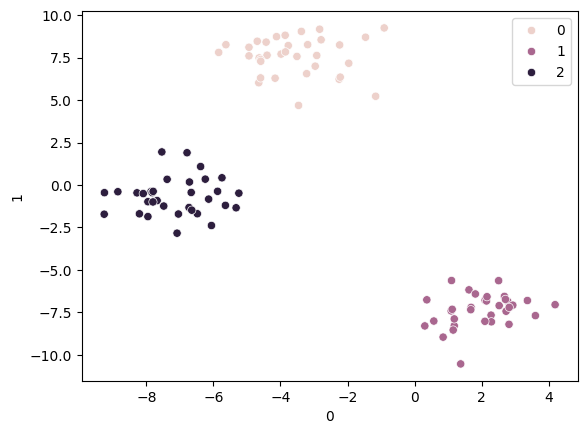

In [5]:
sns.scatterplot(x = X[0], y = X[1], hue = y)

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters = 3)
km.fit(X)
pred = km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

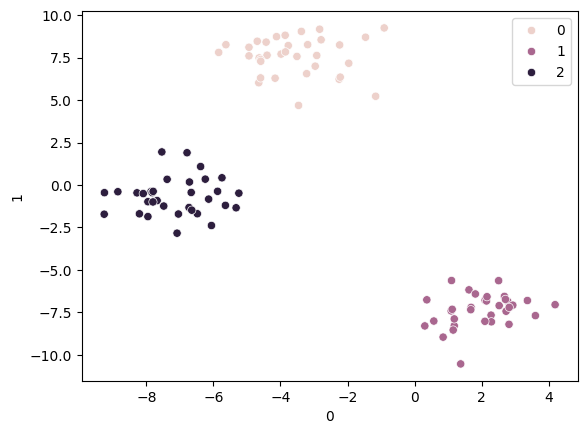

In [8]:
sns.scatterplot(x = X[0], y = X[1], hue = pred)

In [9]:
km = KMeans(n_clusters = 5)
km.fit(X)
pred = km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

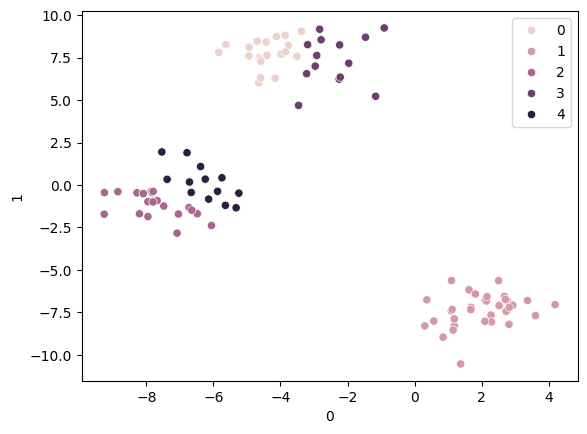

In [10]:
sns.scatterplot(x = X[0], y = X[1], hue = pred)

In [11]:
# 평가값 : 하나의 클러스터 안에 중심점으로부터 각가의 데이터 거리를 합한 값의 평균

km.inertia_

157.77806266176702

In [12]:
inertia_list = []

for i in range(2, 11) :
    km = KMeans(n_clusters = i)
    km.fit(X)
    inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [13]:
inertia_list

[1578.856698952461,
 222.7636237762,
 188.46536707635153,
 158.53469737104996,
 135.53643213582586,
 109.67961520955937,
 91.17664442315893,
 81.60204285102856,
 76.60484310312077]

<Axes: >

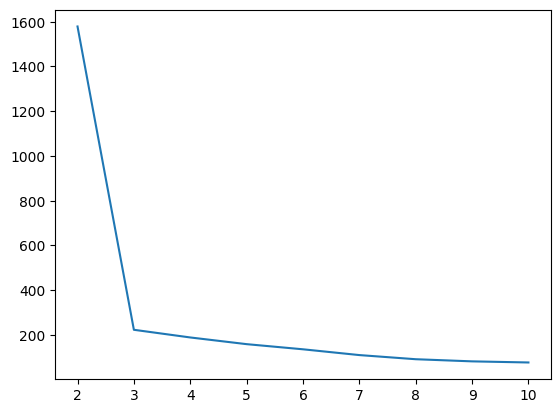

In [14]:
sns.lineplot(x = range(2, 11), y = inertia_list) # 엘보우 메서드

# **2. 마케팅 데이터셋**

In [15]:
mkt_df = pd.read_csv('/content/drive/MyDrive/Korea it 아카데미/data analysis/data/marketing.csv')

In [16]:
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,118,46,27,15,5,5,3,6,5,0


In [17]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* ID: 고객 아이디
* Year_Birth: 출생 연도
* Education: 학력
* Marital_Status: 결혼 여부
* Income: 소득
* Kidhome: 어린이 수
* Teenhome: 청소년 수
* Dt_Customer: 고객 등록일
* Recency: 마지막 구매일로부터 경과일
* MntWines: 와인 구매액
* MntFruits: 과일 구매액
* MntMeatProducts: 육류 구매액
* MntFishProducts: 어류 구매액
* MntSweetProducts: 단맛 제품 구매액
* MntGoldProds: 골드 제품 구매액
* NumDealsPurchases: 할인 행사 구매 수
* NumWebPurchases: 웹에서 구매 수
* NumCatalogPurchases: 카탈로그에서 구매 수
* NumStorePurchases: 매장에서의 구매 수
* NumWebVisitsMonth: 월별 웹 방문 수
* Complain: 불만 여부

In [18]:
mkt_df.drop('ID', axis = 1, inplace = True)

In [19]:
mkt_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [20]:
mkt_df.sort_values('Year_Birth').head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,1
1950,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0
424,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,716,55,0,21,0,7,10,5,2,0


In [21]:
mkt_df.sort_values('Income', ascending = False).head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0


In [22]:
# mkt_df = mkt_df[mkt_df['Income'] < 200000] # nan값도 같이 삭제됨

mkt_df = mkt_df[mkt_df['Income'] != 666666]

In [23]:
mkt_df.sort_values('Income', ascending = False).head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0


In [24]:
mkt_df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
dtype: int64

In [25]:
mkt_df = mkt_df.dropna()

In [26]:
mkt_df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
dtype: int64

In [27]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2215 non-null   int64  
 1   Education            2215 non-null   object 
 2   Marital_Status       2215 non-null   object 
 3   Income               2215 non-null   float64
 4   Kidhome              2215 non-null   int64  
 5   Teenhome             2215 non-null   int64  
 6   Dt_Customer          2215 non-null   object 
 7   Recency              2215 non-null   int64  
 8   MntWines             2215 non-null   int64  
 9   MntFruits            2215 non-null   int64  
 10  MntMeatProducts      2215 non-null   int64  
 11  MntFishProducts      2215 non-null   int64  
 12  MntSweetProducts     2215 non-null   int64  
 13  MntGoldProds         2215 non-null   int64  
 14  NumDealsPurchases    2215 non-null   int64  
 15  NumWebPurchases      2215 non-null   int64 

In [28]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format = '%d-%m-%Y')

In [29]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2215 non-null   int64         
 1   Education            2215 non-null   object        
 2   Marital_Status       2215 non-null   object        
 3   Income               2215 non-null   float64       
 4   Kidhome              2215 non-null   int64         
 5   Teenhome             2215 non-null   int64         
 6   Dt_Customer          2215 non-null   datetime64[ns]
 7   Recency              2215 non-null   int64         
 8   MntWines             2215 non-null   int64         
 9   MntFruits            2215 non-null   int64         
 10  MntMeatProducts      2215 non-null   int64         
 11  MntFishProducts      2215 non-null   int64         
 12  MntSweetProducts     2215 non-null   int64         
 13  MntGoldProds         2215 non-null   i

In [30]:
# 마지막으로 가입된 사람을 기준으로 테이터의 가입 날짜(달)의 차이
# pass_month

mkt_df['pass_month'] = mkt_df['Dt_Customer'].apply(lambda x : (mkt_df['Dt_Customer'].max().year - x.year) *12 + mkt_df['Dt_Customer'].max().month - x.month)


In [31]:
mkt_df.drop('Dt_Customer', axis = 1, inplace = True)

In [32]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,21
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,10
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,4
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,5


In [33]:
# 와인 + 과일 + 육류 + 어류 + 단맛 + 골드
# total_mnt

mkt_df['Total_mnt'] = mkt_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis = 1)

In [34]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,88,88,3,8,10,4,7,0,21,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,6,2,1,1,2,5,0,3,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,21,42,1,8,2,10,4,0,10,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,3,5,2,2,0,4,6,0,4,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,27,15,5,5,3,6,5,0,5,422


In [35]:
mkt_df['children'] = mkt_df[['Kidhome', 'Teenhome']].sum(axis = 1)
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,children
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,88,3,8,10,4,7,0,21,1617,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,6,2,1,1,2,5,0,3,27,2
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,42,1,8,2,10,4,0,10,776,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,5,2,2,0,4,6,0,4,53,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,15,5,5,3,6,5,0,5,422,1


In [36]:
mkt_df.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)

In [37]:
mkt_df['Education'].value_counts()

Education
Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [38]:
mkt_df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [39]:
mkt_df['Marital_Status'] = mkt_df['Marital_Status'].replace({
    'Married' : 'Partner',
    'Together' : 'Partner',
    'Single' : 'Single',
    'Divorced' : 'Single',
    'Widow' : 'Single',
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single'
})

In [40]:
mkt_df['Marital_Status'].value_counts()

Marital_Status
Partner    1429
Single      786
Name: count, dtype: int64

In [41]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2215 non-null   int64  
 1   Education            2215 non-null   object 
 2   Marital_Status       2215 non-null   object 
 3   Income               2215 non-null   float64
 4   Recency              2215 non-null   int64  
 5   MntWines             2215 non-null   int64  
 6   MntFruits            2215 non-null   int64  
 7   MntMeatProducts      2215 non-null   int64  
 8   MntFishProducts      2215 non-null   int64  
 9   MntSweetProducts     2215 non-null   int64  
 10  MntGoldProds         2215 non-null   int64  
 11  NumDealsPurchases    2215 non-null   int64  
 12  NumWebPurchases      2215 non-null   int64  
 13  NumCatalogPurchases  2215 non-null   int64  
 14  NumStorePurchases    2215 non-null   int64  
 15  NumWebVisitsMonth    2215 non-null   int64 

In [42]:
mkt_df = pd.get_dummies(mkt_df, columns = ['Education', 'Marital_Status'])

mkt_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,pass_month,Total_mnt,children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,1957,58138.0,58,635,88,546,172,88,88,3,...,21,1617,0,False,False,True,False,False,False,True
1,1954,46344.0,38,11,1,6,2,1,6,2,...,3,27,2,False,False,True,False,False,False,True
2,1965,71613.0,26,426,49,127,111,21,42,1,...,10,776,0,False,False,True,False,False,True,False
3,1984,26646.0,26,11,4,20,10,3,5,2,...,4,53,1,False,False,True,False,False,True,False
4,1981,58293.0,94,173,43,118,46,27,15,5,...,5,422,1,False,False,False,False,True,True,False


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss = StandardScaler()

In [49]:
mkt_df[['Year_Birth', 'Income', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Complain', 'pass_month', 'Total_mnt', 'children']] = ss.fit_transform(
    mkt_df[['Year_Birth', 'Income', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Complain', 'pass_month', 'Total_mnt', 'children']]
)

In [50]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year_Birth              2215 non-null   float64
 1   Income                  2215 non-null   float64
 2   Recency                 2215 non-null   float64
 3   MntWines                2215 non-null   float64
 4   MntFruits               2215 non-null   float64
 5   MntMeatProducts         2215 non-null   float64
 6   MntFishProducts         2215 non-null   float64
 7   MntSweetProducts        2215 non-null   float64
 8   MntGoldProds            2215 non-null   float64
 9   NumDealsPurchases       2215 non-null   float64
 10  NumWebPurchases         2215 non-null   float64
 11  NumCatalogPurchases     2215 non-null   float64
 12  NumStorePurchases       2215 non-null   float64
 13  NumWebVisitsMonth       2215 non-null   float64
 14  Complain                2215 non-null   float

In [51]:
mkt_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,pass_month,Total_mnt,children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,-0.986016,0.286604,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,0.352088,...,1.474609,1.675011,-1.264487,False,False,True,False,False,False,True
1,-1.236344,-0.261407,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,-0.167829,...,-1.231986,-0.962727,1.405522,False,False,True,False,False,False,True
2,-0.318476,0.912723,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,-0.687745,...,-0.179421,0.279830,-1.264487,False,False,True,False,False,True,False
3,1.266933,-1.176680,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,-0.167829,...,-1.081620,-0.919594,0.070517,False,False,True,False,False,True,False
4,1.016605,0.293806,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,1.391921,...,-0.931253,-0.307440,0.070517,False,False,False,False,True,True,False


In [53]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year_Birth              2215 non-null   float64
 1   Income                  2215 non-null   float64
 2   Recency                 2215 non-null   float64
 3   MntWines                2215 non-null   float64
 4   MntFruits               2215 non-null   float64
 5   MntMeatProducts         2215 non-null   float64
 6   MntFishProducts         2215 non-null   float64
 7   MntSweetProducts        2215 non-null   float64
 8   MntGoldProds            2215 non-null   float64
 9   NumDealsPurchases       2215 non-null   float64
 10  NumWebPurchases         2215 non-null   float64
 11  NumCatalogPurchases     2215 non-null   float64
 12  NumStorePurchases       2215 non-null   float64
 13  NumWebVisitsMonth       2215 non-null   float64
 14  Complain                2215 non-null   float

# **3. KMeans**

* K 개의  중심점을 찍은 후에 이 중심점에서 각 점간의 거리의 합이 가장 최소가 되는 중심점 k의 위치를 찾고 이 중심점에서 가까운 점을 기준으로 묶는 알고리즘(k개의 클러스터의 수는 정해주어야 한다.)

<center><img src = "https://media.geeksforgeeks.org/wp-content/uploads/20190812011831/Screenshot-2019-08-12-at-1.09.42-AM.png"><center>


* 군집의 개수 (k) 설정 -> 초기 중심점 설정 -> [데이터를 군집에 할당(배정) -> 중심점 재설정(갱신)] 반복


In [56]:
inertia_list = []

for i in range(2, 11) :
    km = KMeans(n_clusters = i, random_state = 2024)
    km.fit(mkt_df)
    inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [57]:
inertia_list

[29919.188055126753,
 26905.233635156495,
 24780.99000529778,
 23751.670604933766,
 22709.4038715457,
 22233.565555106637,
 21141.751890886546,
 20654.2152917408,
 20236.488337531802]

<Axes: >

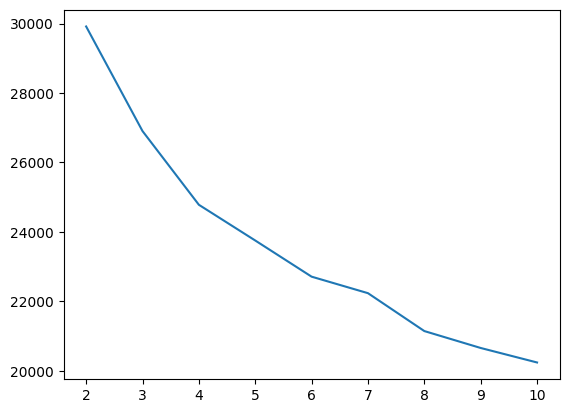

In [59]:
sns.lineplot(x = range(2, 11), y = inertia_list)

# **4. 실루엣 스코어(Silhouette Score)**

* 실루엣 스코어는 클러스터링의 품질을 평가하는 지표로, 각 데이터 포인트가 자신이 속한 클러스터와 얼마나 유사하고 다른 클러스터와는 얼마나 다른지를 측정
* -1 에서 1사이의 값을 가지며 값이 클수록 클러스터링의 품질이 높다고 볼 수 있음

In [60]:
from sklearn.metrics import silhouette_score

In [61]:
score = []

for i in range(2, 11) :
    km = KMeans(n_clusters = i, random_state = 2024)
    km.fit(mkt_df)
    pred = km.predict(mkt_df)
    score.append(silhouette_score(mkt_df, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [62]:
score

[0.296789866551826,
 0.20144426178353647,
 0.20982124721599427,
 0.1169123171804603,
 0.10312058061546078,
 0.0876739256263883,
 0.10134194134091229,
 0.10086273294875897,
 0.10071335750020176]

<Axes: >

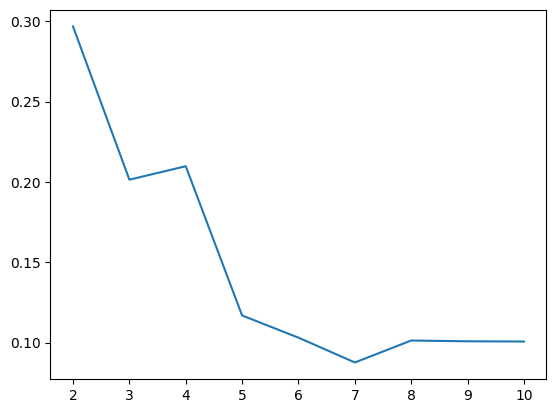

In [63]:
sns.lineplot(x = range(2, 11), y = score)

In [65]:
km = KMeans(n_clusters = 4, random_state = 2024)
km.fit(mkt_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2024)

In [66]:
pred = km.predict(mkt_df)
pred

array([2, 0, 2, ..., 2, 1, 0], dtype=int32)

In [68]:
mkt_df['label'] = pred
mkt_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Total_mnt,children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single,label
0,-0.986016,0.286604,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,0.352088,...,1.675011,-1.264487,False,False,True,False,False,False,True,2
1,-1.236344,-0.261407,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,-0.167829,...,-0.962727,1.405522,False,False,True,False,False,False,True,0
2,-0.318476,0.912723,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,-0.687745,...,0.279830,-1.264487,False,False,True,False,False,True,False,2
3,1.266933,-1.176680,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,-0.167829,...,-0.919594,0.070517,False,False,True,False,False,True,False,0
4,1.016605,0.293806,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,1.391921,...,-0.307440,0.070517,False,False,False,False,True,True,False,1


In [71]:
mkt_df['label'].value_counts()

label
0    1019
2     590
1     585
3      21
Name: count, dtype: int64

* 공부해보기

    * k-neighbors (KNN) : 거리 기반 모델, 지도학습 기반 알고리즘, 회귀/분류
    * 나이브 베이즈(Naive Bayes) : 베이즈 정리를 적용한 조건부 확률 기반 분류 모델, 지도학습 기반 알고리즘, 분류
    * XGboost : 순차적으로 트리를 만들어 이전 트리로부터 더 나은 트리를 만들어내는 알고리즘, 지도학습, 회귀/분류
    * lightGBM : 최신 부스팅 모델, 지도 학습, 회귀/분류
    